In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('fraudTrain.csv')

In [ ]:
df1 = pd.read_csv('fraudTest.csv')

In [ ]:
df = pd.concat([df,df1])

In [ ]:
df.shape

(1852394, 23)

In [ ]:
esfraude= df[df['is_fraud']==1]
esfraude.shape

(9651, 23)

In [ ]:
noesfraude= df[df['is_fraud']==0]
noesfraude.shape

(1842743, 23)

In [ ]:
df.set_index('Unnamed: 0') # seteo el indice

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


In [ ]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time']) # transformamos el tipo de dato de la columna trans_date_trans_time en fecha y creamos dos columnas, dia de la semana y mes
df['day_of_week'] =df['trans_date_trans_time'].dt.day_name()
df['month'] =df['trans_date_trans_time'].dt.month_name()
df['day_of_week']
df['month']

0          January
1          January
2          January
3          January
4          January
            ...   
555714    December
555715    December
555716    December
555717    December
555718    December
Name: month, Length: 1852394, dtype: object

In [ ]:
# Creamos columna age, que resulta de la diferencia entre la variable now y la columna dob " date of birthday"
import datetime as dt
now = pd.Timestamp('now')
df['dob'] = df['dob'].apply(pd.to_datetime)
df['age'] = (now - df['dob']).astype('<m8[Y]')  

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,day_of_week,month,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Tuesday,January,33.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Tuesday,January,43.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Tuesday,January,59.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Tuesday,January,54.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Tuesday,January,35.0


In [ ]:
df.set_index('Unnamed: 0', inplace = True) # seteo el indice

In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,day_of_week,month,age
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Tuesday,January,33.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Tuesday,January,43.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Tuesday,January,59.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Tuesday,January,54.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Tuesday,January,35.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time              

In [ ]:
dft = df[['category','cc_num','amt','gender','merchant','city','job','unix_time','state','is_fraud','day_of_week','month','age']]# Seleccionamos las columnas que en entregas anteriores definimos como apropiadas para trabajar.

In [ ]:
dft.head()

,category,cc_num,amt,gender,merchant,city,job,unix_time,state,is_fraud,day_of_week,month,age
Unnamed: 0,,,,,,,,,,,,,
0,misc_net,2703186189652095,4.97,F,"fraud_Rippin, Kub and Mann",Moravian Falls,"Psychologist, counselling",1325376018,NC,0,Tuesday,January,33.0
1,grocery_pos,630423337322,107.23,F,"fraud_Heller, Gutmann and Zieme",Orient,Special educational needs teacher,1325376044,WA,0,Tuesday,January,43.0
2,entertainment,38859492057661,220.11,M,fraud_Lind-Buckridge,Malad City,Nature conservation officer,1325376051,ID,0,Tuesday,January,59.0
3,gas_transport,3534093764340240,45.00,M,"fraud_Kutch, Hermiston and Farrell",Boulder,Patent attorney,1325376076,MT,0,Tuesday,January,54.0
4,misc_pos,375534208663984,41.96,M,fraud_Keeling-Crist,Doe Hill,Dance movement psychotherapist,1325376186,VA,0,Tuesday,January,35.0


In [ ]:
from sklearn import preprocessing # Transformamos los variables categoricas en numericas
#from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()
dft['category']= label_encoder.fit_transform(dft['category'])
dft['gender']= label_encoder.fit_transform(dft['gender'])
dft['merchant']= label_encoder.fit_transform(dft['merchant'])
dft['city']= label_encoder.fit_transform(dft['city'])
dft['job']= label_encoder.fit_transform(dft['job'])
dft['state']= label_encoder.fit_transform(dft['state'])
dft['day_of_week']= label_encoder.fit_transform(dft['day_of_week'])
dft['month']= label_encoder.fit_transform(dft['month'])
dft.head()

,category,cc_num,amt,gender,merchant,city,job,unix_time,state,is_fraud,day_of_week,month,age
Unnamed: 0,,,,,,,,,,,,,
0,8,2703186189652095,4.97,0,514,532,372,1325376018,27,0,5,4,33.0
1,4,630423337322,107.23,0,241,619,431,1325376044,47,0,5,4,43.0
2,0,38859492057661,220.11,1,390,474,308,1325376051,13,0,5,4,59.0
3,2,3534093764340240,45.00,1,360,84,330,1325376076,26,0,5,4,54.0
4,9,375534208663984,41.96,1,297,217,116,1325376186,45,0,5,4,35.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Separamos en X e Y
X = dft.drop(["is_fraud"], axis=1)
y = dft["is_fraud"]

In [ ]:
#Separamos en train y test!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (1481915, 12), (1481915,)
Train Data: (370479, 12), (370479,)


In [ ]:
# Creamos un Random Forest y lo entrenamos!
classifier = RandomForestClassifier(random_state=18)
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=18)

In [ ]:
# Calculamos las predicciones!
predictions = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.9977704539258635


[[368358    180]
 [   646   1295]]


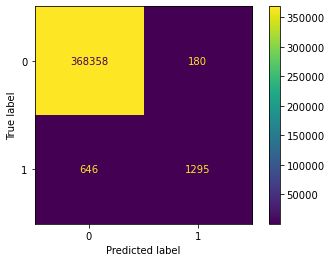

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Matriz de Confusión
print(confusion_matrix(y_test, predictions))

#Ploteamos la Matriz
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import precision_score

# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

Precision Score of the classifier is: 0.8779661016949153


In [ ]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

Recall Score of the classifier is: 0.6671818650180319


In [ ]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")


F1 Score of the classifier is: 0.7581967213114754


AUC for our classifier is: 0.9837830737111817


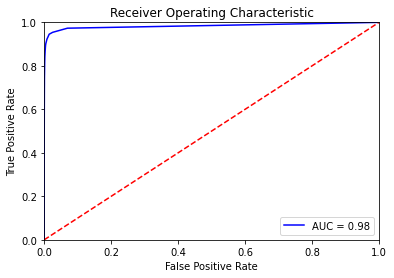

In [ ]:
#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

 ### Verdaderos positivos (TP): estos son los casos en los que el "Sí" predicho en realidad pertenecía a la clase "Sí".
### Negativos verdaderos (TN): Estos son los casos en los que el “No” predicho en realidad pertenecía a la clase “No”.
### Falsos positivos (FP): estos son los casos en los que el "Sí" predicho en realidad pertenecía a la clase "No".
### Falsos negativos (FN): estos son los casos en los que el "No" predicho en realidad pertenecía a la clase "Sí".

### Podemos ver que la presicion ronda el 88% debido al desbalanceo del dataset, es decir, mayores transacciones en 0 ( no fraudulentas).
### Por otro lado vemos que el recall es del 66% por el mismo motivo.
### finalmente nuestro F1 score es aceptable "75" y la curva ROC nos dice que el algoritmo performan bastante bien con un valor de 0.98



# Como conclusion final vemos que de los 3 algoritmos utilizados (Decisiontreeclassifier, KNN, RandomForest),donde este ultimo es el que mejor trabaja con nuestros datos debido a que Random Forest se basa en el algoritmo de bagging y utiliza la técnica aprendizaje por conjunto. Crea tantos árboles en el subconjunto de datos y combina la salida de todos los árboles. De esta manera, se observará que algunas ventajas y desventajas coinciden con las del bagging. Las principales ventajas son:

## • Reduce el problema de sobreajuste en los árboles de decisión, también reduce la variación y, como consecuencia, mejora la precisión
## • Puede manejar hasta miles de variables de entrada e identificar las más significativas.Método de reducción de dimensionalidad.
## • Existen muy pocas suposiciones y por lo tanto la preparación de los datos es mínima (no es necesario escalar los valores, por ejemplo)
## • Incorpora métodos efectivos para estimar valores faltantes.
## • Random Forest suele ser robusto para los valores atípicos y puede manejarlos automáticamente